In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
# matplotlib inline is to display the plots inside the note book
import seaborn as sns
import os

In [4]:
os.chdir('C:/Users/Wan Yun/Documents/Wan Yun/Term 6/Computational Data Science/Project') 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity


From here, we can observe the unique categories in the dataset 

In [5]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

The graph below shows the frequency distribution of categories. The most common category is Family.

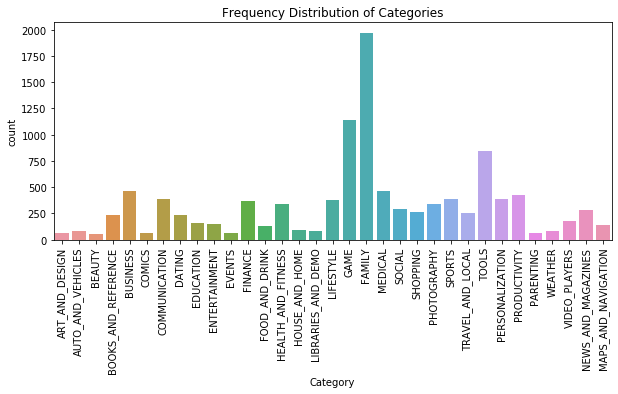

In [10]:
fig = plt.figure(figsize = (10,4))
plt.tight_layout()
plt.title('Frequency Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
sns.countplot(df['Category'])
plt.xticks(rotation = 90)
fig.savefig('../Frequency Distribution of Categories.png', bbox_inches = "tight")


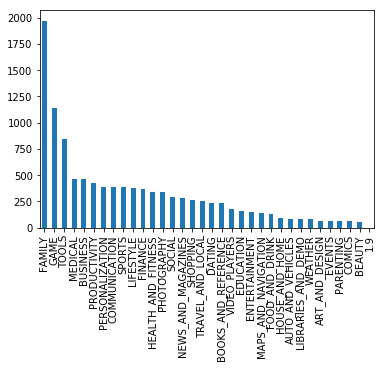

In [24]:
df.Category.value_counts().plot(kind = 'bar')

From the plots below, we can see the age distribution of the reviewer. Since 'everyone' is the most common type of reviewer, 
the age distribution is deemed not useful for our analysis. 

In [37]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+',
       'Unrated', nan], dtype=object)

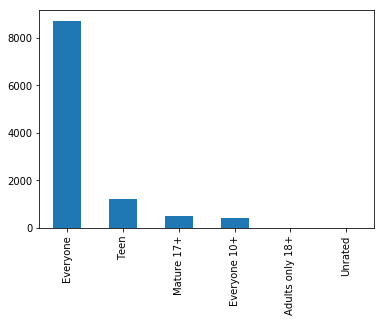

In [38]:
df['Content Rating'].value_counts().plot(kind = 'bar')

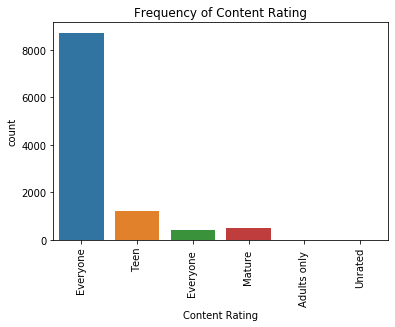

In [64]:
sns.countplot(df['Content Rating'])
plt.xticks(rotation = 90)
plt.title('Frequency of Content Rating')
fig.savefig('../Content_rating.png', bbox_inches = "tight")


In [14]:
df.describe()

,Rating,Reviews,Size,Installs
count,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04
mean,4.191757,4.441529e+05,2.151653e+07,1.546434e+07
std,0.515219,2.927761e+06,2.258875e+07,8.502936e+07
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00
25%,4.000000,3.800000e+01,4.900000e+06,1.000000e+03
50%,4.300000,2.094000e+03,1.300000e+07,1.000000e+05
75%,4.500000,5.477550e+04,3.000000e+07,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09


After the cleaning of our data, we are able to ensure that the range of rating is from 1 to 5. 

Text(0.5, 1.0, 'Frequency of Free and Paid Apps')

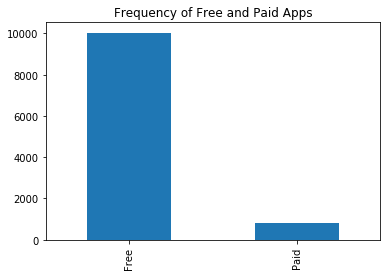

In [15]:
df['Type'].value_counts().plot(kind = 'bar')
plt.title('Frequency of Free and Paid Apps')


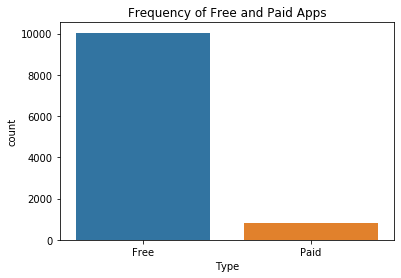

In [65]:
sns.countplot(df['Type'])
plt.title('Frequency of Free and Paid Apps')
fig.savefig('../Type.png', bbox_inches = "tight")

From the graph above, we can observe that number of free Apps is much larger compared to paid App, this information is deemed
not useful for the prediction of the ratings. 

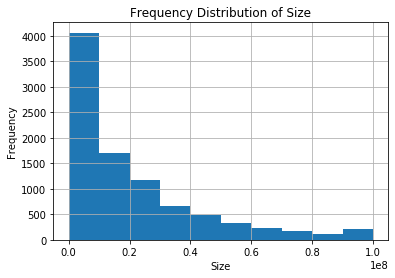

In [66]:
df['Size'].hist()
plt.title('Frequency Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
fig.savefig('../Size.png', bbox_inches = "tight")

In [41]:
df.Installs = df.Installs.apply(lambda x: x.strip('+'))
df.Installs = df.Installs.apply(lambda x: x.replace(",",''))
df.Installs = df.Installs.apply(lambda x: x.replace('Free',''))

In [74]:
df.Installs = pd.to_numeric(df.Installs)

In [21]:
df.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

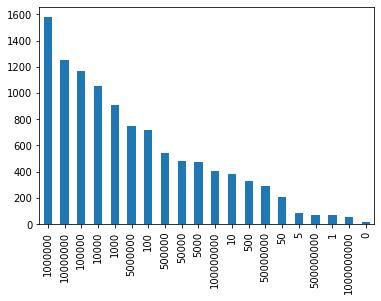

In [22]:
df.Installs.value_counts().plot(kind = 'bar')


The install number is deemed not useful in the prediction of the rating as the numbers available are not exact number. 

In [23]:
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

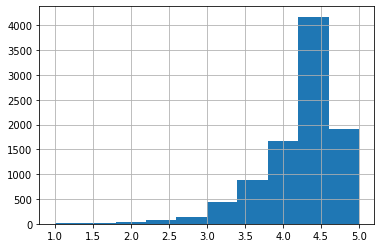

In [24]:
df.Rating.hist()

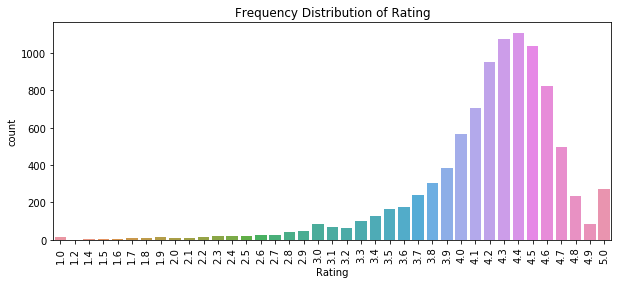

In [29]:
fig = plt.figure(figsize = (10,4))
plt.tight_layout()
plt.title('Frequency Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.countplot(df['Rating'])
plt.xticks(rotation = 90)
fig.savefig('../Frequency Distribution of Rating.png', bbox_inches = "tight")

As we can see from the graph above, rating range from 1-5, with mean of 4.191757. The distribution is negatively skewed. 

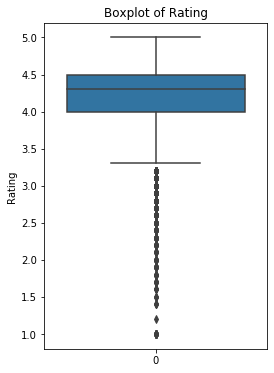

In [35]:
fig = plt.figure(figsize = (4,6))
plt.tight_layout()
plt.title('Boxplot of Rating')
plt.ylabel('Rating')
sns.boxplot(data = df['Rating'])
fig.savefig('../BoxplotofRating.png', bbox_inches = "tight")

In [36]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [54]:
df.Price = df.Price.apply(lambda x : x.strip('$'))
df.Price = df.Price.apply(lambda x : x.replace('Everyone','0'))
###Replace everyone with zero

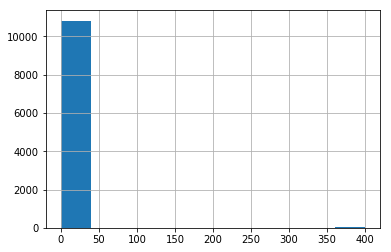

In [56]:
df.Price=pd.to_numeric(df.Price)
df.Price.hist()

As shown in the graph above, most of the prices are zero, so the price is deemed not useful in our analysis 

<Figure size 720x288 with 0 Axes>

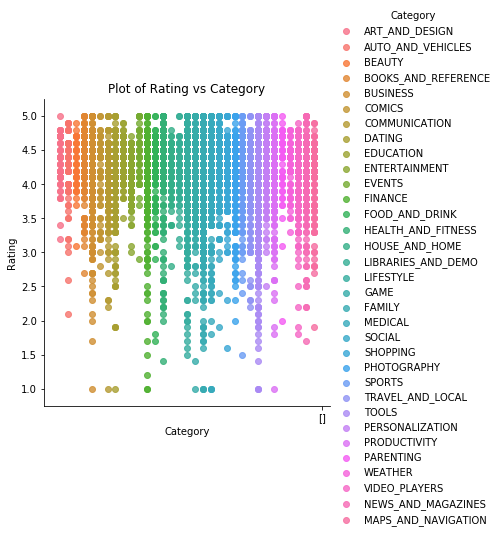

In [54]:

fig = plt.figure(figsize = (10,4))
sns.lmplot(data = df, x = 'Category',y ='Rating', fit_reg = False, hue = 'Category')
plt.title('Plot of Rating vs Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks('[]')
plt.savefig('../Rating_Category.png',bbox_inches = "tight")



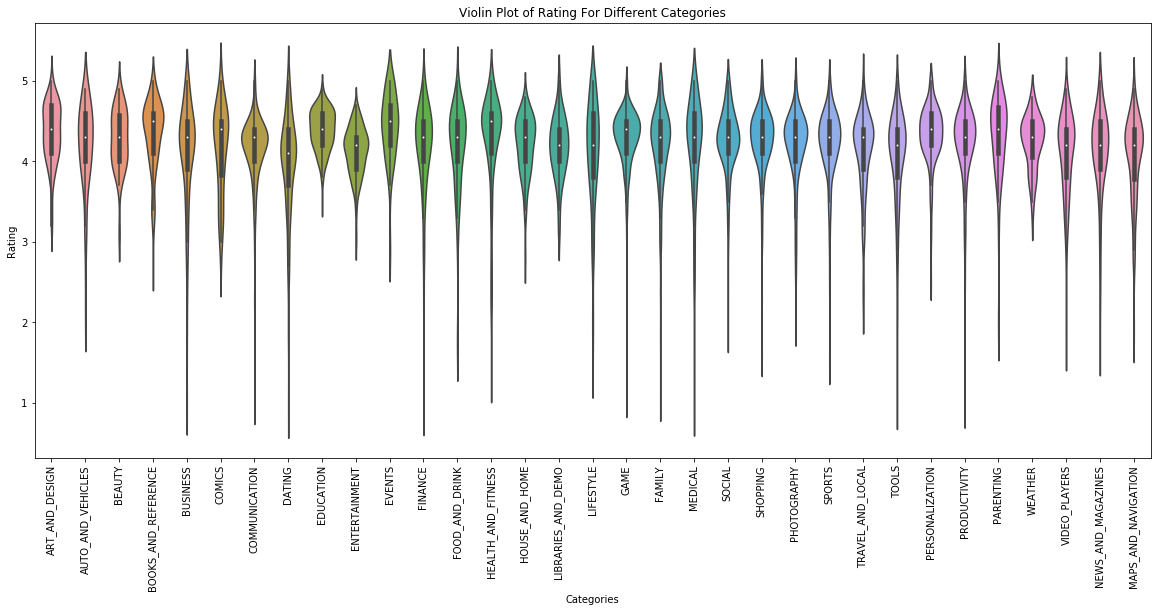

In [63]:
fig = plt.figure(figsize = (20,8))
sns.violinplot(x = 'Category', y = 'Rating', data = df)
plt.xticks(rotation = 90)
plt.title('Violin Plot of Rating For Different Categories')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.savefig('../Violin_Rating_Category.png',bbox_inches = "tight")


From both the violin plot and linear plot, we can see that the ratings do not differ for differnt categories. 

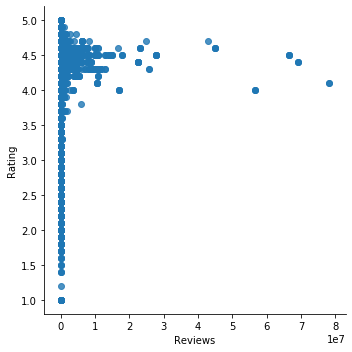

In [55]:
sns.lmplot(data = df, x = 'Reviews',y ='Rating', fit_reg = False) # Need to drop the roq which the rating is more than 5 

There is no clear relationship between Rating and Reviews 

In [92]:
melt_df = pd.melt(df, # the data to be melted
                  id_vars = ['Rating','Price','Reviews'], # the variables to be kept 
                  var_name = "Stat") # the new variable name with all the melted variable
melt_df.dropna()

melt_df.head(155)

,Rating,Price,Reviews,Stat,value
0,4.1,0.0,159,App,Photo Editor & Candy Camera & Grid & ScrapBook
1,3.9,0.0,967,App,Coloring book moana
2,4.7,0.0,87510,App,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,4.5,0.0,215644,App,Sketch - Draw & Paint
4,4.3,0.0,967,App,Pixel Draw - Number Art Coloring Book
5,4.4,0.0,167,App,Paper flowers instructions
6,3.8,0.0,178,App,Smoke Effect Photo Maker - Smoke Editor
7,4.1,0.0,36815,App,Infinite Painter
8,4.4,0.0,13791,App,Garden Coloring Book
9,4.7,0.0,121,App,Kids Paint Free - Drawing Fun


In [ ]:
g = sns.factorplot(data = df,
                  x = 'Rating',
                  y = 'Price',
                  hue = 'Category',
                  kind = 'swarm',
                  col = 'Category')

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

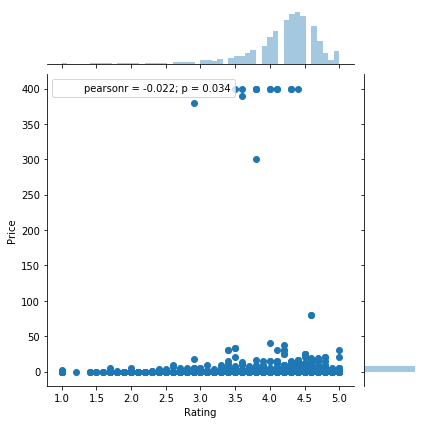

In [109]:
sns.jointplot(data = df, x = "Rating", y = "Price")

In [2]:
import pandas as pd
df_sentiment = pd.read_csv('C:/Users/User/Desktop/Wan Yun/Term 6/Computational Data Science/Project/googleplaystore_user_reviews.csv')

In [3]:
df_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
